In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Решение

In [2]:
lambda_param = 1.0 

In [3]:
rv = sts.expon(scale=1/lambda_param)
sample = rv.rvs(size=1000)

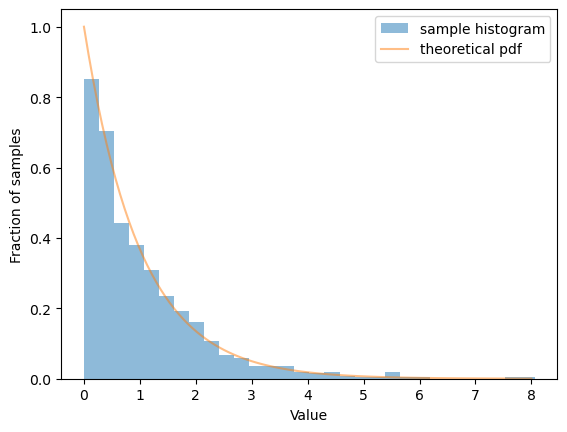

In [4]:
x = np.linspace(0, 8, 100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram', alpha=0.5)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('Fraction of samples')
plt.xlabel('Value')
plt.show()

In [5]:
sample_sizes = [2, 5, 10, 30, 50]

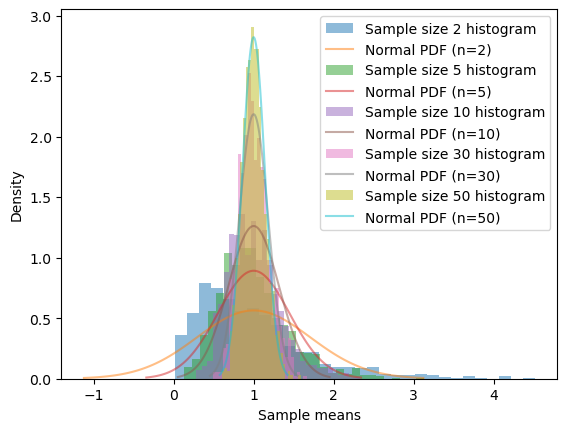

In [6]:
for n in sample_sizes:
    a = np.array([])  # Массив для сохранения средних по выборкам
    samples_count = 1000 

    for _ in range(samples_count):
        sample_n = rv.rvs(size=n)
        a = np.append(a, sample_n.mean())

    label = f'Sample size {n} histogram'
    plt.hist(a, density=True, bins=30, alpha=0.5, label=label)

    # Теоретическая нормальная плотность для сравнения
    mean = rv.mean()
    std = rv.std() / np.sqrt(n)
    normal_rv = sts.norm(loc=mean, scale=std)
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    plt.plot(x, normal_rv.pdf(x), label=f'Normal PDF (n={n})', alpha=0.5)

plt.legend()
plt.ylabel('Density')
plt.xlabel('Sample means')
plt.show()

# Выводы

На первом графике представлена гистограмма выборки из экспоненциального распределения. Она показывает, что данные имеют экспоненциальную форму, и наложена теоретическая плотность вероятности.

Мы видим, что по мере увеличения размера выборки распределение средних значений становится всё более нормальным, что подтверждает действие ЦПТ. Это хорошо видно для больших значений n (например, 30 и 50), где распределение средних уже близко к нормальному.

Сходимость к нормальному распределению: Это демонстрирует, что независимо от формы исходного распределения (в данном случае экспоненциального), распределение средних значений выборок будет стремиться к нормальному распределению по мере увеличения размера выборки.